In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
pd.set_option('display.max_columns', None)

In [206]:
df = pd.read_csv('flats&house_combined.csv').drop_duplicates()

In [207]:
df.head()

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7926.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
2,2,2,Flat,sector 111,puri diplomatic greens,3.40,2950.0,11525.0,Super Built up area 2950(274.06 sq.m.),4,5,3+,14th of 21 Floors,East,Relatively New,[Green Area5 out of 5 Construction5 out of 5 M...,14.0,21.0,2950.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,5,0,2,94,NaN,NaN,NaN,3.0,4.0,4.0,5.0,5.0
3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18090.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5


In [208]:
df.shape

(3802, 54)

In [209]:
df.columns

Index(['Unnamed: 0', 'index', 'property_type', 'sector', 'society', 'price',
       'area', 'price_per_sqft', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'floorNum', 'facing', 'agePossession', 'rating', 'floor_Num',
       'total_floors', 'super_built_up_area', 'carpet_area', 'Built_up_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'TV', 'Bed', 'Microwave', 'Geyser', 'Fan', 'Chimney', 'Water Purifier',
       'Dining Table', 'Sofa', 'Fridge', 'Modular Kitchen', 'Stove', 'Light',
       'Curtains', 'Exhaust Fan', 'Wardrobe', 'AC', 'Washing Machine',
       'furnishing_type', 'luxury_score', 'Safety', 'Lifestyle', 'Environment',
       'Connectivity', 'Management', 'Amenities', 'Green_area',
       'Construction'],
      dtype='object')

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

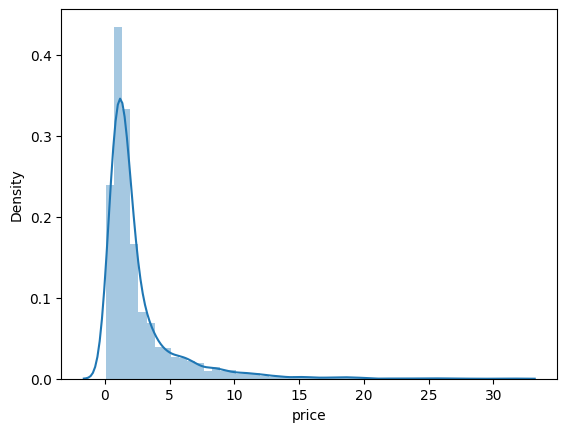

In [210]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

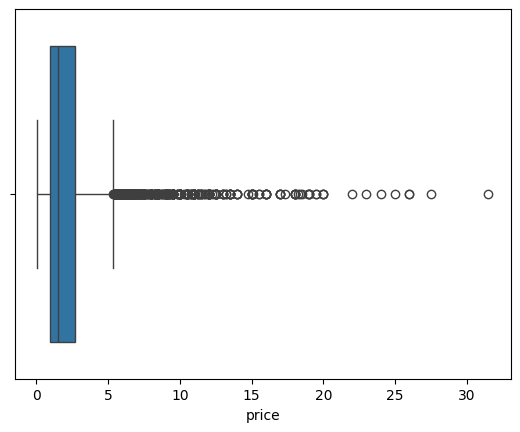

In [211]:
sns.boxplot(x=df['price'])

In [212]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [213]:
outliers.sort_values('price',ascending=False).head(20)

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
316,316,316,house,sector 26,arjun marg/ sector- 26 phase- 1/ golf course road,31.50,9000.0,35000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,7,0,1,6,15,1,1,1,1,1,1,1,0,1,1,9,10,1,1,74,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
111,111,111,house,sector 43,independent,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0,1,7,6,2,1,0,0,0,1,1,22,1,1,10,7,0,2,42,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
3674,3674,3674,house,sector 26,dlf city plots,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0,1,6,12,1,0,0,0,0,1,1,32,10,1,10,8,0,2,138,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1673,1673,1673,house,sector 26,independent,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,350.0,400.0,1,1,1,1,0,0,0,1,20,26,1,1,0,0,0,1,1,21,1,1,26,26,0,1,72,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
3614,3614,3614,house,sector 54,suncity township,25.00,8036.0,31111.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,[Environment4 out of 5 Safety4 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN
1241,1241,1241,house,sector 54,emaar the palm springs,24.00,400.0,600000.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,0,0,0,0,7,8,1,0,0,0,0,0,0,32,0,1,0,8,0,2,122,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN
2508,2508,2508,house,sector 26,independent,23.00,9000.0,25556.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,5,7,1,0,0,0,0,1,1,10,1,1,5,5,0,2,145,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
754,754,754,house,sector 48,vipul tatvam villa,22.00,8250.0,26667.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,10,0,0,5,6,0,0,54,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
805,805,805,house,sector 26,independent,20.00,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,5,5,0,5,16,1,1,1,1,1,1,1,25,1,1,5,10,1,1,97,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1535,1535,1535,house,sector 26,dlf city plots,20.00,4518.0,44265.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,undefined,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,11,0,1,0,0,0,0,1,0,0,0,1,0,16,0,2,153,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN


In [214]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

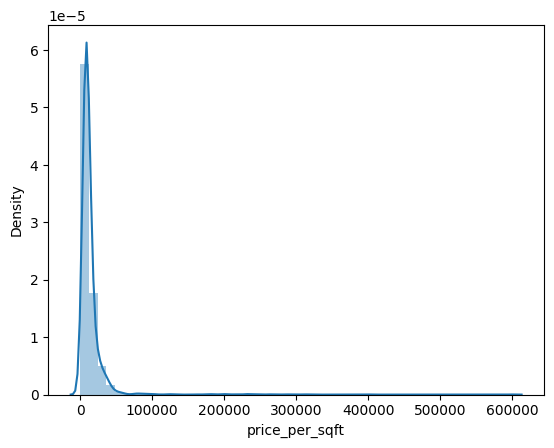

In [215]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

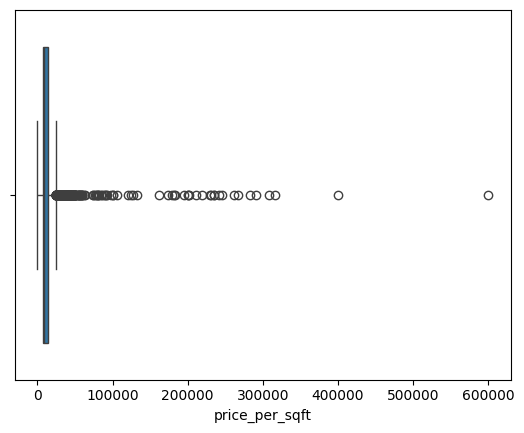

In [216]:
sns.boxplot(x=df['price_per_sqft'])

In [217]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(367,
 count       367.000000
 mean      52115.435967
 std       60746.225927
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41790.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [218]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [219]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [220]:
outliers_sqft['price_per_sqft'].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [221]:
df.update(outliers_sqft)

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

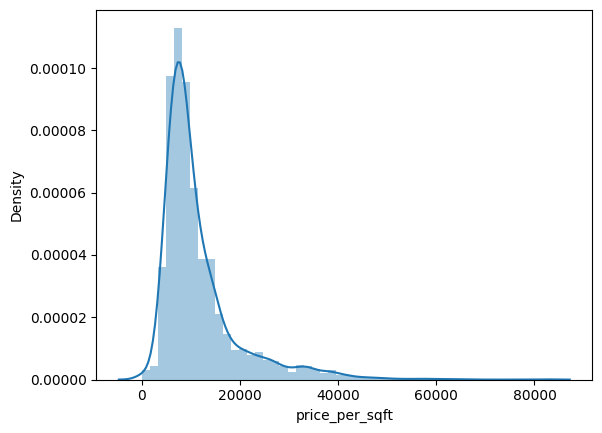

In [222]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

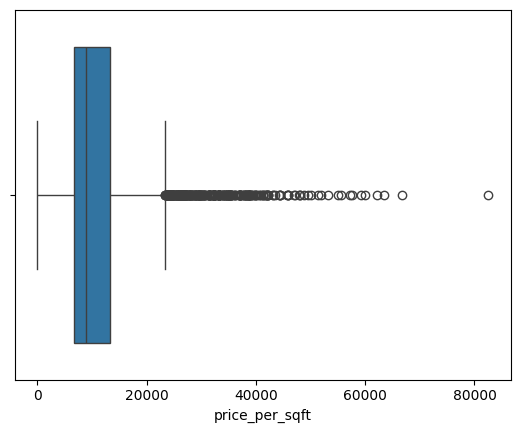

In [223]:
sns.boxplot(x=df['price_per_sqft'])

In [224]:
df[df['price_per_sqft']>50000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
52,52,52,house,sector 26,independent,14.75,2844.0,51864.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,7,0,2,153,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
89,89,89,house,sector 28,nul,12.50,2430.0,51440.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0,4,16,20,4,0,0,0,0,1,1,30,2,1,16,16,0,1,137,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN
291,291,291,house,sector 54,emaar the palm springs,14.00,2250.0,62222.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,0,5,5,1,0,0,0,0,1,0,19,0,1,0,8,1,2,160,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN
475,475,475,house,sector 31,project housing board colony,8.00,1260.0,63492.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,undefined,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,140.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1241,1241,1241,house,sector 54,emaar the palm springs,24.00,3600.0,66667.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,0,0,0,0,7,8,1,0,0,0,0,0,0,32,0,1,0,8,0,2,122,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN
1673,1673,1673,house,sector 26,independent,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,350.0,400.0,1,1,1,1,0,0,0,1,20,26,1,1,0,0,0,1,1,21,1,1,26,26,0,1,72,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1909,1909,1909,house,sohna road road,cloudnine cottages,5.50,1000.0,55000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,2017,2017,Flat,sector 70,unitech vistas,9.00,1565.0,57508.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7th of 7 Floors,NaN,undefined,[Environment4 out of 5 Safety3.5 out of 5 Life...,7.0,7.0,NaN,NaN,1565.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,4.0,4.0,3.0,NaN,NaN,NaN,NaN
2680,2680,2680,house,sector 66,emaar mgf marbella,18.00,3240.0,55556.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,[Environment3 out of 5 Safety4 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,0,0,0,1,7,16,1,1,0,0,1,1,1,30,0,1,20,10,1,1,75,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
2697,2697,2697,house,sector 92,independent,16.00,2700.0,59259.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,300.0,325.0,1,1,1,1,0,0,0,1,21,24,1,1,0,0,0,1,1,51,0,1,24,24,0,1,72,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN


In [225]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

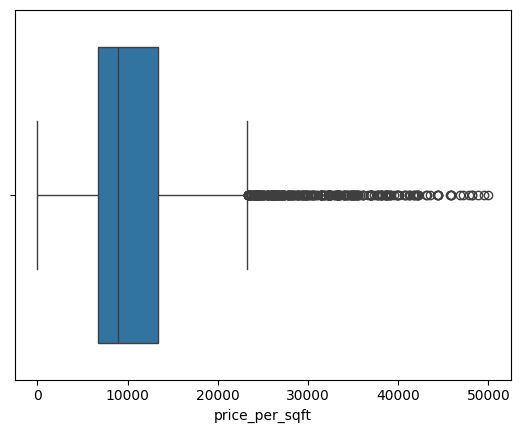

In [226]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

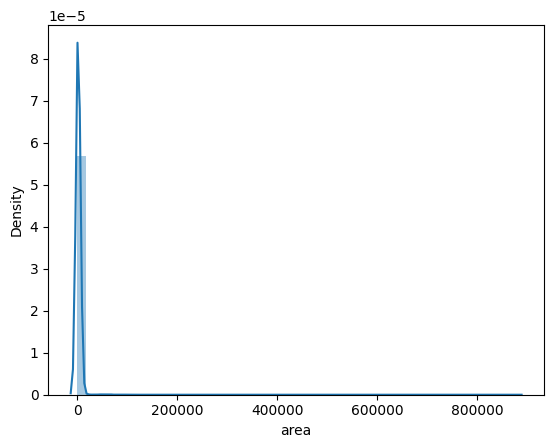

In [227]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

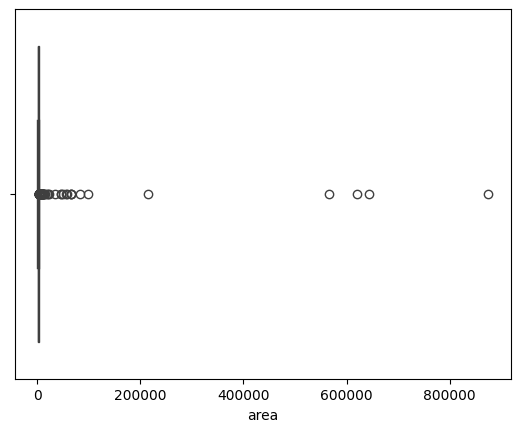

In [228]:
sns.boxplot(x=df['area'])

In [229]:
df['area'].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: area, dtype: float64

In [230]:
df[df['area'] > 100000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
1399,1399,1399,Flat,sector 107,signature global solera 2,0.51,566667.0,9.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3rd of 13 Floors,North,New Property,[Environment3 out of 5 Lifestyle2 out of 5 Con...,3.0,13.0,NaN,514396.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,1.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN
1849,1849,1849,Flat,sector 95,ramsons kshitij,0.31,620000.0,5.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1st of 14 Floors,North-East,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,1.0,14.0,NaN,607936.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0
1989,1989,1989,Flat,sector 95,signature the roselia,0.45,642857.0,7.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2nd of 19 Floors,South-West,New Property,[Green Area4 out of 5 Amenities4 out of 5 Mana...,2.0,19.0,NaN,569243.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,NaN,NaN,NaN,3.0,4.0,4.0,4.0,4.0
2434,2434,2434,house,sector 50,independent,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,2,0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2841,2841,2841,Flat,sohna road,hcbs sports ville,0.35,875000.0,4.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8th of 13 Floors,NaN,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,8.0,13.0,NaN,NaN,737147.0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,44,NaN,NaN,NaN,2.0,4.0,4.0,4.0,4.0


In [231]:
df = df[df['area'] < 100000]

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

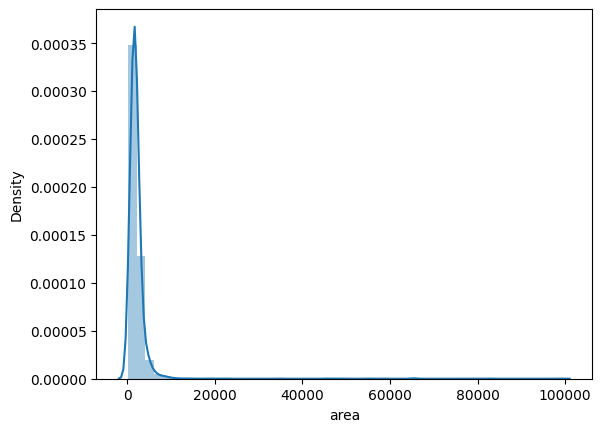

In [232]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

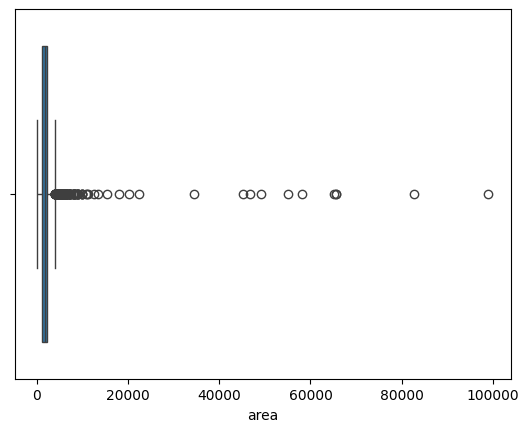

In [233]:
sns.boxplot(x=df['area'])

In [234]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
2595,2595,2595,house,sector 26,independent,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,11000.00,NaN,0,1,1,1,0,0,0,0,8,16,1,0,0,0,0,1,1,94,0,1,6,11,0,2,60,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
860,860,860,house,sector 13,ganpati heights apartment,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,7,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
224,224,224,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10th of 14 Floors,East,New Property,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,10.0,14.0,NaN,64529.00,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
647,647,647,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12nd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,12.0,14.0,NaN,64412.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1258,1258,1258,house,sector 28,dlf city plot phase 4,13.00,65261.0,1992.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,undefined,[Environment5 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,7250.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN
2926,2926,2926,Flat,sector 86,pyramid elite,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,Ground of 14 Floors,NaN,Under Construction,[Environment5 out of 5 Safety4.5 out of 5 Life...,0.0,14.0,NaN,58141.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,5.0,5.0,4.5,NaN,NaN,NaN,NaN
2137,2137,2137,Flat,sector 95,rof ananda,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13rd of 14 Floors,South-West,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,54917.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
3223,3223,3223,Flat,sohna road,signature the serenas,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1st of 14 Floors,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,1.0,14.0,NaN,48811.00,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1272,1272,1272,house,sector 25,independent,7.30,46795.0,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,5200.00,5800.0,0,1,1,0,0,0,0,0,0,12,0,0,0,0,0,1,0,28,0,1,0,0,0,2,109,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2558,2558,2558,Flat,sector 95,ramsons kshitij,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10th of 14 Floors,North-West,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,10.0,14.0,NaN,45966.00,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0


In [235]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [236]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
2595,2595,2595,house,sector 26,independent,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,11000.00,NaN,0,1,1,1,0,0,0,0,8,16,1,0,0,0,0,1,1,94,0,1,6,11,0,2,60,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
860,860,860,house,sector 13,ganpati heights apartment,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,7,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
647,647,647,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12nd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,12.0,14.0,NaN,64412.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
224,224,224,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10th of 14 Floors,East,New Property,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,10.0,14.0,NaN,64529.00,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1258,1258,1258,house,sector 28,dlf city plot phase 4,13.00,65261.0,1992.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,undefined,[Environment5 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,7250.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN
2926,2926,2926,Flat,sector 86,pyramid elite,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,Ground of 14 Floors,NaN,Under Construction,[Environment5 out of 5 Safety4.5 out of 5 Life...,0.0,14.0,NaN,58141.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,5.0,5.0,4.5,NaN,NaN,NaN,NaN
2137,2137,2137,Flat,sector 95,rof ananda,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13rd of 14 Floors,South-West,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,54917.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
3223,3223,3223,Flat,sohna road,signature the serenas,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1st of 14 Floors,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,1.0,14.0,NaN,48811.00,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1272,1272,1272,house,sector 25,independent,7.30,46795.0,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,5200.00,5800.0,0,1,1,0,0,0,0,0,0,12,0,0,0,0,0,1,0,28,0,1,0,0,0,2,109,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2558,2558,2558,Flat,sector 95,ramsons kshitij,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10th of 14 Floors,North-West,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,10.0,14.0,NaN,45966.00,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0


In [237]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

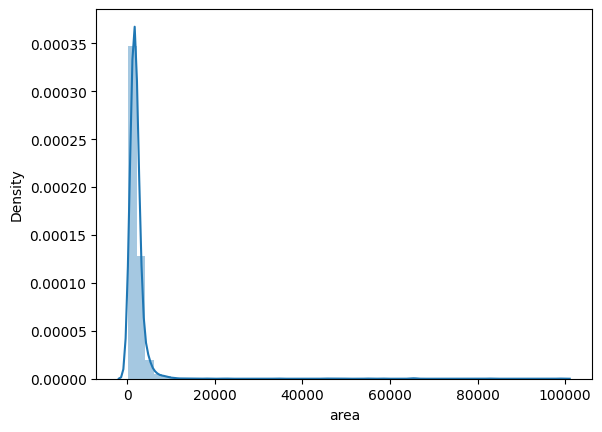

In [238]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

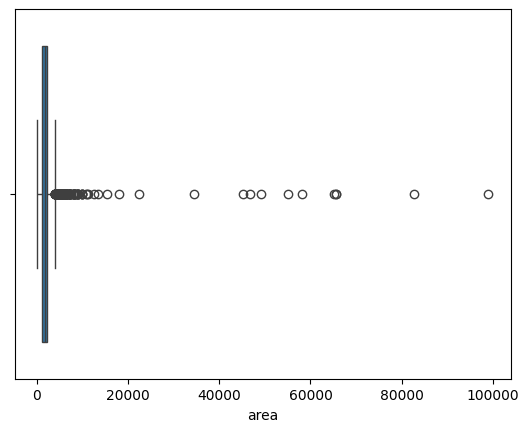

In [239]:
sns.boxplot(x=df['area'])

In [240]:
df['area'].describe()

count     3758.000000
mean      2133.322778
std       3562.931896
min        145.000000
25%       1255.500000
50%       1744.500000
75%       2331.250000
max      98978.000000
Name: area, dtype: float64

### Bedroom

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

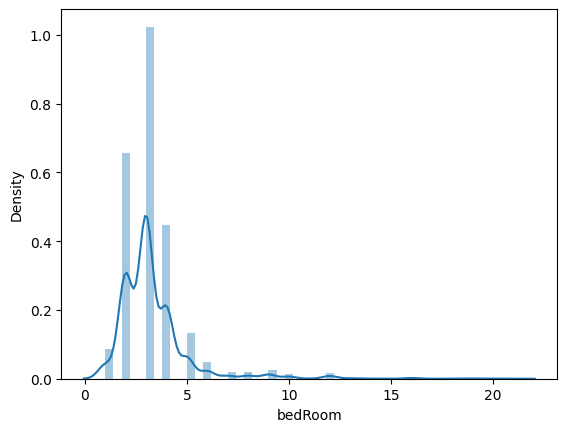

In [241]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

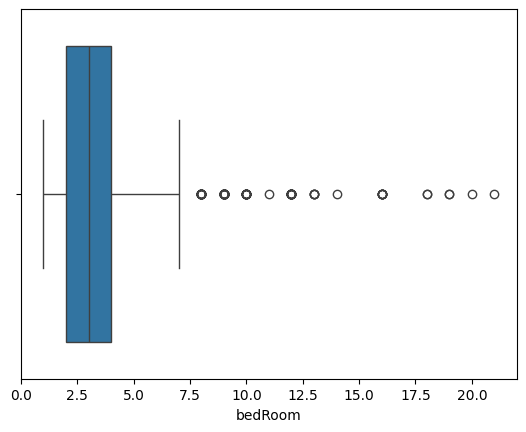

In [242]:
sns.boxplot(x=df['bedRoom'])

In [243]:
df['bedRoom'].describe()

count    3758.000000
mean        3.308409
std         1.809945
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [244]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
1200,1200,1200,house,sector 54,independent,5.00,1161.0,43066.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,21,1,21,21,1,1,1,1,1,1,1,21,1,1,21,0,1,1,49,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN
2597,2597,2597,house,sector 43,independent,4.50,1152.0,39062.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,20,1,20,20,0,1,1,1,1,0,1,0,1,1,20,0,1,1,22,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2200,2200,2200,house,sector 17a,independent,3.87,7500.0,5160.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,7500.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1982,1982,1982,house,sector 17a,independent,3.93,1623.0,24214.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1622.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
3379,3379,3379,house,sector 55,private house,7.05,1503.0,46906.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,18,0,0,21,18,18,0,0,0,1,1,0,0,21,1,18,18,0,1,57,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
2921,2921,2921,house,sector 54,independent,5.50,1440.0,38194.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,18,36,1,18,22,1,1,0,0,1,1,0,40,0,1,36,18,1,1,70,5.0,4.5,5.0,4.0,NaN,NaN,NaN,NaN
2085,2085,2085,house,sector 56,independent,12.39,2700.0,45889.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,3,4,1,0,0,0,0,1,1,8,0,1,0,0,0,2,49,4.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN
1535,1535,1535,house,sector 26,dlf city plots,20.00,4518.0,44267.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,undefined,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,11,0,1,0,0,0,0,1,0,0,0,1,0,16,0,2,153,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1378,1378,1378,house,sector 55,independent,9.19,2700.0,34037.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,[Environment4 out of 5 Safety4 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,3,9,1,0,0,0,0,1,1,16,0,1,8,0,0,2,49,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1024,1024,1024,house,sector 43,independent,13.50,2700.0,50000.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN


In [245]:
df = df[df['bedRoom'] <= 10]

In [246]:
df.shape

(3713, 54)

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

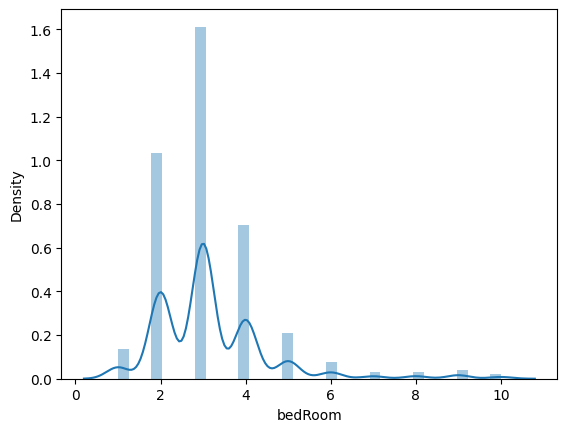

In [247]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

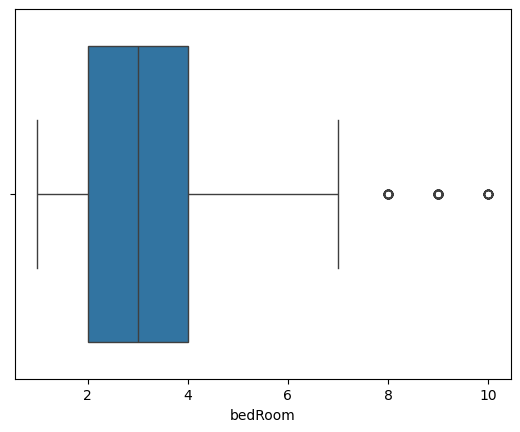

In [248]:
sns.boxplot(x=df['bedRoom'])

In [249]:
df['bedRoom'].describe()

count    3713.000000
mean        3.182602
std         1.382249
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

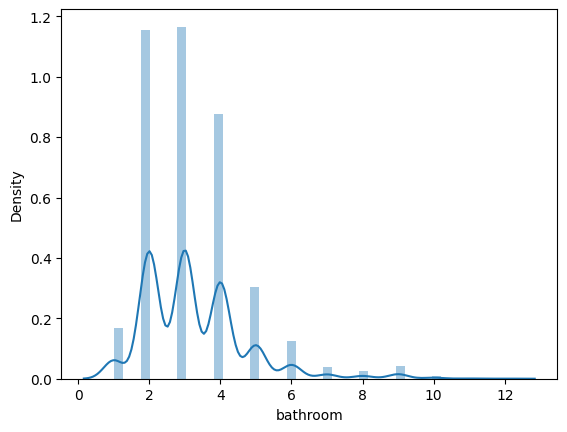

In [250]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

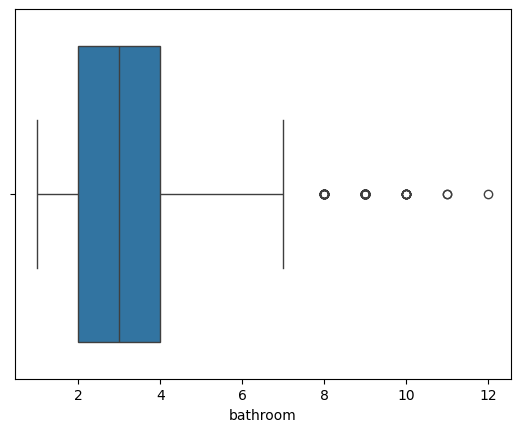

In [251]:
sns.boxplot(x=df['bathroom'])

In [252]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
2512,2512,2512,house,sector 60,adani brahma samsara,18.02,6390.0,28200.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,[Environment4.5 out of 5 Lifestyle5 out of 5 C...,NaN,NaN,NaN,NaN,6390.0,0,1,0,0,0,0,0,0,12,0,1,0,0,0,0,1,0,0,0,1,0,12,0,2,146,4.5,5.0,4.5,3.5,NaN,NaN,NaN,NaN
430,430,430,house,sector 24,independent,11.00,3806.0,28902.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,5000.0,1,1,0,1,1,0,0,0,8,12,0,0,0,0,0,1,0,40,11,1,8,0,0,2,39,4.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN
677,677,677,house,sector 39,independent,7.00,7000.0,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,7000.0,0,0,0,1,0,0,7,0,1,38,1,1,0,1,0,1,0,100,1,1,18,0,0,1,38,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN


In [253]:
df.head()

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7926.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18090.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19500.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,NaN,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0


### super built up area

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

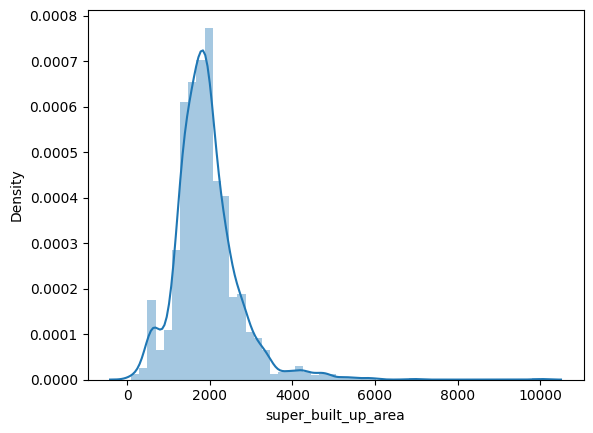

In [254]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

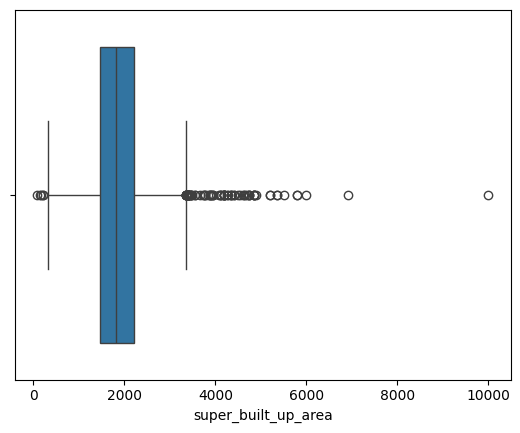

In [255]:
sns.boxplot(x=df['super_built_up_area'])

In [256]:
df['super_built_up_area'].describe()

count     1910.000000
mean      1919.041126
std        764.770571
min         89.000000
25%       1457.000000
50%       1827.250000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [257]:
df[df['super_built_up_area'] > 6000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
1008,1008,1008,Flat,gwal pahari,krrish provence estate,7.5,10000.0,7500.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23rd of 26 Floors,North-East,Relatively New,NaN,23.0,26.0,10000.0,NaN,NaN,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3301,3301,3301,Flat,sector 81,bestech park view grand spa,4.7,6926.0,6786.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19th of 21 Floors,North,Relatively New,[Green Area5 out of 5 Construction5 out of 5 M...,19.0,21.0,6926.0,NaN,NaN,0,1,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,4,0,1,4,4,0,2,140,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0


### built up area

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2969986165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Built_up_area'])


<Axes: xlabel='Built_up_area', ylabel='Density'>

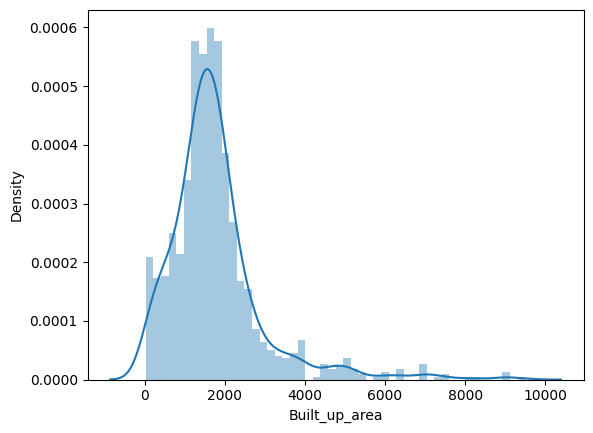

In [258]:
sns.distplot(df['Built_up_area'])

<Axes: xlabel='Built_up_area'>

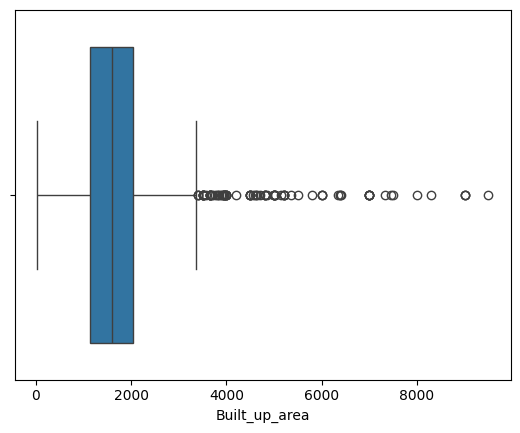

In [259]:
sns.boxplot(x=df['Built_up_area'])

In [260]:
df[df['Built_up_area'] > 10000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction


### carpet area

C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

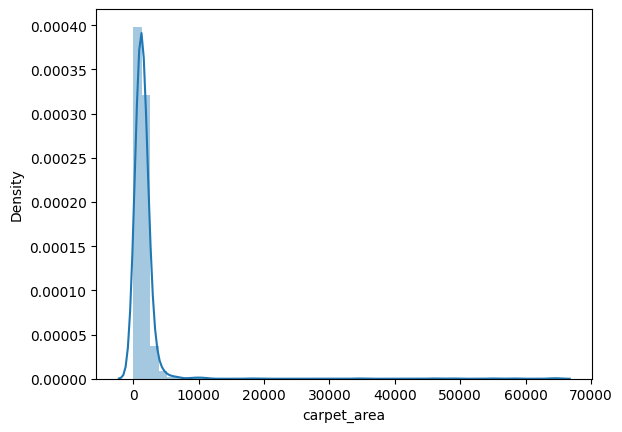

In [261]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

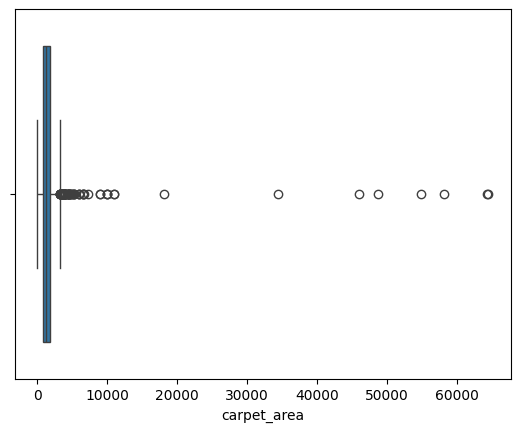

In [262]:
sns.boxplot(x=df['carpet_area'])

In [263]:
df[df['carpet_area'] > 10000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
224,224,224,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10th of 14 Floors,East,New Property,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,10.0,14.0,NaN,64529.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
647,647,647,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12nd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,12.0,14.0,NaN,64412.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1013,1013,1013,Flat,sector 95,rof ananda,0.21,34426.0,61.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13rd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,34401.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1389,1389,1389,Flat,sector 85,godrej air,2.50,18129.0,1379.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16th of 24 Floors,North-East,undefined,[Environment5 out of 5 Lifestyle5 out of 5 Con...,16.0,24.0,NaN,18122.0,NaN,1,0,0,1,1,0,0,0,0,4,2,1,0,0,0,1,1,0,0,0,4,4,0,2,44,4.5,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2137,2137,2137,Flat,sector 95,rof ananda,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13rd of 14 Floors,South-West,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,54917.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
2535,2535,2535,Flat,sector 65,m3m golfestate,13.20,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13rd of 40 Floors,North,Moderately Old,[Green Area5 out of 5 Construction5 out of 5 M...,13.0,40.0,NaN,11000.0,NaN,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,8,0,0,0,0,0,0,60,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2558,2558,2558,Flat,sector 95,ramsons kshitij,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10th of 14 Floors,North-West,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,10.0,14.0,NaN,45966.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0
2595,2595,2595,house,sector 26,independent,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,11000.0,NaN,0,1,1,1,0,0,0,0,8,16,1,0,0,0,0,1,1,94,0,1,6,11,0,2,60,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2926,2926,2926,Flat,sector 86,pyramid elite,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,Ground of 14 Floors,NaN,Under Construction,[Environment5 out of 5 Safety4.5 out of 5 Life...,0.0,14.0,NaN,58141.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,5.0,5.0,4.5,NaN,NaN,NaN,NaN
3223,3223,3223,Flat,sohna road,signature the serenas,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1st of 14 Floors,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,1.0,14.0,NaN,48811.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN


In [264]:
df.loc[2131,'carpet_area'] = 1812

In [265]:
df[df['carpet_area'] > 10000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
224,224,224,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10th of 14 Floors,East,New Property,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,10.0,14.0,NaN,64529.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
647,647,647,Flat,sector 95,rof ananda,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12nd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,12.0,14.0,NaN,64412.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1013,1013,1013,Flat,sector 95,rof ananda,0.21,34426.0,61.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13rd of 14 Floors,North,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,34401.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
1389,1389,1389,Flat,sector 85,godrej air,2.50,18129.0,1379.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16th of 24 Floors,North-East,undefined,[Environment5 out of 5 Lifestyle5 out of 5 Con...,16.0,24.0,NaN,18122.0,NaN,1,0,0,1,1,0,0,0,0,4,2,1,0,0,0,1,1,0,0,0,4,4,0,2,44,4.5,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2137,2137,2137,Flat,sector 95,rof ananda,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13rd of 14 Floors,South-West,Relatively New,[Environment4 out of 5 Lifestyle4.5 out of 5 C...,13.0,14.0,NaN,54917.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.5,4.5,4.0,4.0,NaN,NaN,NaN,NaN
2535,2535,2535,Flat,sector 65,m3m golfestate,13.20,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13rd of 40 Floors,North,Moderately Old,[Green Area5 out of 5 Construction5 out of 5 M...,13.0,40.0,NaN,11000.0,NaN,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,8,0,0,0,0,0,0,60,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2558,2558,2558,Flat,sector 95,ramsons kshitij,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10th of 14 Floors,North-West,Relatively New,[Green Area4 out of 5 Construction4 out of 5 M...,10.0,14.0,NaN,45966.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0
2595,2595,2595,house,sector 26,independent,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,11000.0,NaN,0,1,1,1,0,0,0,0,8,16,1,0,0,0,0,1,1,94,0,1,6,11,0,2,60,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2926,2926,2926,Flat,sector 86,pyramid elite,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,Ground of 14 Floors,NaN,Under Construction,[Environment5 out of 5 Safety4.5 out of 5 Life...,0.0,14.0,NaN,58141.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,4.5,5.0,5.0,4.5,NaN,NaN,NaN,NaN
3223,3223,3223,Flat,sohna road,signature the serenas,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1st of 14 Floors,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,1.0,14.0,NaN,48811.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN


In [266]:
df.head()

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7926.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18090.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19500.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,NaN,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0


C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

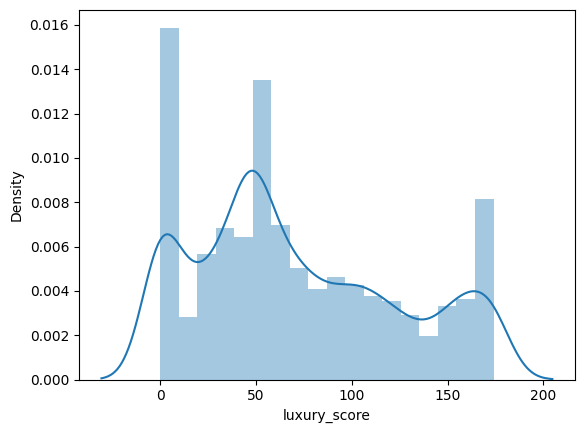

In [267]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

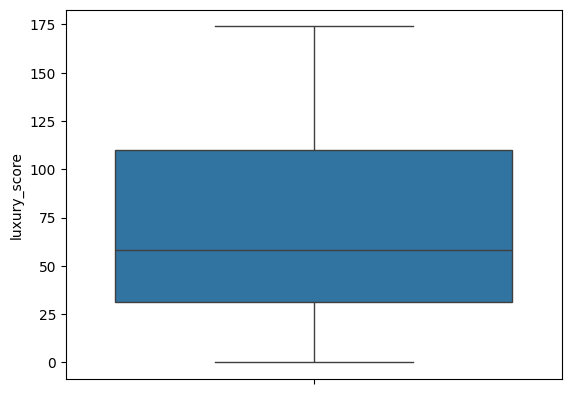

In [268]:
sns.boxplot(df['luxury_score'])

In [269]:
df.shape

(3713, 54)

In [270]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [271]:
df.head()

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7927.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18091.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19499.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,NaN,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0


C:\Users\rutur\AppData\Local\Temp\ipykernel_4292\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

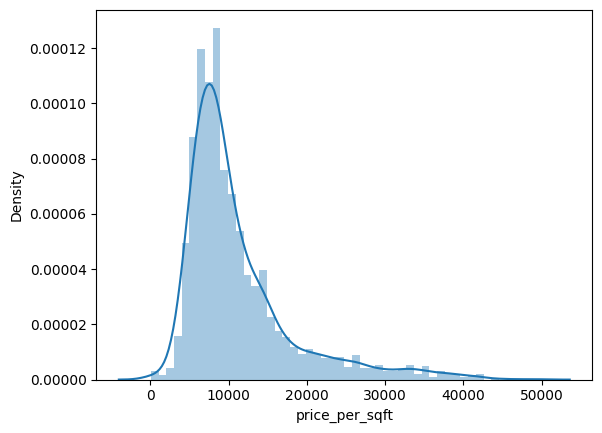

In [272]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

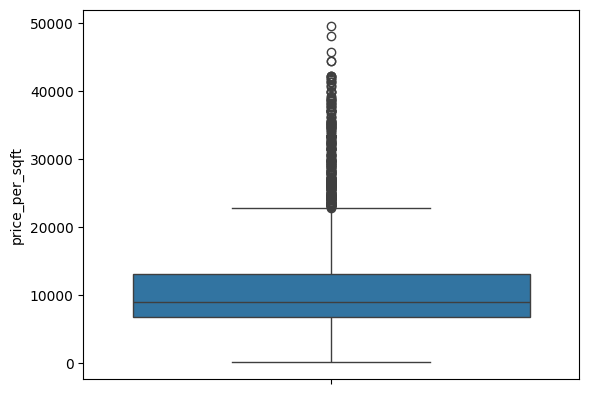

In [273]:
sns.boxplot(df['price_per_sqft'])

In [274]:
df[df['price_per_sqft'] > 42000]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
456,456,456,house,sector 55,independent,5.0,1125.0,44444.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,[Environment4 out of 5 Safety4 out of 5 Lifest...,NaN,NaN,NaN,100.0,115.0,0,0,0,0,1,10,0,0,9,14,9,0,0,0,0,0,0,17,0,0,10,10,0,2,44,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
571,571,571,house,sector 43,independent,9.5,2250.0,42222.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,[Environment5 out of 5 Safety4.5 out of 5 Life...,NaN,NaN,NaN,250.0,300.0,0,1,0,1,0,0,0,0,5,6,1,1,0,0,0,1,1,31,1,1,10,5,0,2,88,4.5,5.0,5.0,5.0,NaN,NaN,NaN,NaN
805,805,805,house,sector 26,independent,20.0,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,5,5,0,5,16,1,1,1,1,1,1,1,25,1,1,5,10,1,1,97,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2123,2123,2123,house,sector 25,independent,13.0,2844.0,45710.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,0,1,1,0,26,1,1,0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2243,2243,2243,house,sector 26,dlf city plots,19.0,4518.0,42054.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,0,6,10,1,0,0,0,0,1,1,22,0,1,4,0,0,2,121,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2395,2395,2395,house,sector 43,sushant lok 1 builder floors,13.0,2700.0,48148.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,[Environment5 out of 5 Safety4.5 out of 5 Life...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,4,12,4,0,0,0,0,0,0,0,0,0,8,12,0,2,7,4.5,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2897,2897,2897,house,sector 26,independent,19.0,4500.0,42222.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0,11,1,0,0,0,0,1,0,55,1,1,0,9,0,2,103,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
3625,3625,3625,house,sector 28,independent,12.0,2844.0,42194.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,[Environment5 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,1,1,0,0,0,0,1,2,1,0,0,0,0,1,1,1,0,1,1,1,0,2,60,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN
3755,3755,3755,house,sector 105,independent,9.9,2000.0,49500.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,1800.0,2000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


In [275]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

194.328

In [276]:
df[(df['area']/df['bedRoom'])<183]

,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
32,32,32,house,sector 2,independent,0.98,1080.0,9074.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,120.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
139,139,139,house,sector 12,bhawani enclave,0.42,510.0,8235.0,Plot area 565(52.49 sq.m.)Carpet area: 510 sq....,3,3,0,2.0,East,New Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,510.0,NaN,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
173,173,173,house,sector 12,jacob pura,0.35,360.0,9722.0,Built Up area: 360 (33.45 sq.m.),2,1,0,NaN,NaN,Old Property,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,360.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN
205,205,205,house,sector 105,independent,0.60,540.0,11111.0,Plot area 60(50.17 sq.m.),8,4,3,3.0,West,New Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,17,0,0,0,0,0,0,17,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
243,243,243,house,sector 9,independent,0.35,360.0,9722.0,Plot area 40(33.45 sq.m.),2,2,1,2.0,South-East,Old Property,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3482,3482,house,sector 4,independent,0.50,477.0,10482.0,Built Up area: 53 (44.31 sq.m.),5,3,0,1.0,NaN,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
3519,3519,3519,house,sector 12,rk excelo,0.60,450.0,13333.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,5,3,2,3.0,North,Moderately Old,[Environment3.5 out of 5 Lifestyle4.5 out of 5...,NaN,NaN,NaN,15.0,30.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.5,3.5,5.0,NaN,NaN,NaN,NaN
3574,3574,3574,house,sector 43,ansal,1.85,540.0,34259.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,53,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
3636,3636,3636,house,sector 6,surendra homes dayaindependentd colony,0.75,480.0,15625.0,Built Up area: 480 (44.59 sq.m.),4,4,2,1.0,NaN,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,480.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN


In [277]:
df.to_csv("gurgaon_outlier_treated.csv")